Gourav Verma<br>
DSC-550 : Data Mining<br>
Summer-2020<br>
Term Project<br>
Professor - Brant Abeln

## Customer Segmentation and Recommendation based on Age and Review

### Problem Statement

Understanding customer sentiments is of paramount importance in marketing strategies today. Not only will it give companies an insight as to how customers perceive their products and/or services, but it will also give them an idea on how to improve their offers. 

### Proposal

This project will use the Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. I will be using Machine Learning techniques in which we divide the customers based on their sentiments generated by product review and age. <br>
This project will also utilize recommendation algorithms to create a model in order to prove clothing recommendations to the customers based on their age and clothing ratings. It is useful to get this information so that the store can get help in personalize marketing and provide customers with relevant deals.

In [1]:
# Import important libraries
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import __version__ as mpv
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import __version__ as sklv
from afinn import Afinn
import pickle

# Libraries for recommendation algorithms
import surprise
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import NormalPredictor
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from typing import Dict, Any

# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline

C:\Users\goura\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Review versions of libraries
print('Using version %s of pandas' % pd.__version__)
print('Using version %s of pandas_profiling' % pp.__version__)
print('Using version %s of matplotlib' % mpv)
print('Using version %s of seaborn' % sns.__version__)
print('Using version %s of sklearn' % sklv)
print('Using version %s of numpy' % np.__version__)
print('Using version %s of surprise' % surprise.__version__)

Using version 1.0.5 of pandas
Using version 2.8.0 of pandas_profiling
Using version 3.3.0 of matplotlib
Using version 0.9.0 of seaborn
Using version 0.21.3 of sklearn
Using version 1.16.5 of numpy
Using version 1.1.1 of surprise


### Data Review

In [3]:
# Load the data
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# Run profile report of the data
pp.ProfileReport(df).to_notebook_iframe()

### Customer segmentation using K-means

We will use review comments by customers to derive their sentiment score and then cluster them based on their age group.<br>
<br>
#### Get sentiment score
To get sentiment score we will use AFINN sentiment analysis in Python. It is a wordlist based approach for sentiment analysis. The AFINN lexicon is perhaps one of the simplest and most popular lexicons that can be used extensively for sentiment analysis.The current version of the lexicon is AFINN-en-165. txt and it contains over 3,300+ words with a polarity score associated with each word.<br>
https://github.com/fnielsen/afinn/tree/master/afinn/data


In [6]:
# Drop unrequired columns from the dataset

kmean_df = df.drop(['Unnamed: 0', 'Clothing ID','Class Name','Department Name','Title',
                     'Division Name','Recommended IND'],axis=1)

# Drop rows with null values
kmean_df.dropna(inplace=True)

kmean_df.head()

,Age,Review Text,Rating,Positive Feedback Count
0,33,Absolutely wonderful - silky and sexy and comf...,4,0
1,34,Love this dress! it's sooo pretty. i happene...,5,4
2,60,I had such high hopes for this dress and reall...,3,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,0
4,47,This shirt is very flattering to all due to th...,5,6


In [7]:
# initialize sentiment analyzer
afinn = Afinn()

In [8]:
# converting review text to sentiment score
kmean_df['Review Text'] = kmean_df['Review Text'].str.lower() 
kmean_df['sent_score'] = kmean_df.apply(lambda row: afinn.score(row['Review Text']), axis=1) 
kmean_df.head()

,Age,Review Text,Rating,Positive Feedback Count,sent_score
0,33,absolutely wonderful - silky and sexy and comf...,4,0,9.0
1,34,love this dress! it's sooo pretty. i happene...,5,4,12.0
2,60,i had such high hopes for this dress and reall...,3,0,5.0
3,50,"i love, love, love this jumpsuit. it's fun, fl...",5,0,22.0
4,47,this shirt is very flattering to all due to th...,5,6,6.0


The **pickle** module implements binary protocols for serializing and de-serializing a Python object structure. “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream, and “unpickling” is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy. Pickling (and unpickling) is alternatively known as “serialization”, “marshalling,” or “flattening”; however, to avoid confusion, the terms used here are “pickling” and “unpickling”.<br>
Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [9]:
sent_score = kmean_df['sent_score'].values 
with open("sent.txt", "wb") as fp:
    #Pickling 
    pickle.dump(sent_score, fp) 

with open("sent.txt", "rb") as fp: 
    # Unpickling 
    b = pickle.load(fp) 
print(b)

kmean_df['sent_score'] = b

[ 9. 12.  5. ...  9. 14.  9.]


Positive score means positive sentiment and negative score means negative sentiment. To check the distribution we will add negative score so that we will have all sentiment score to the positive side.

In [10]:
print('minimum sentiment score = ', np.min(kmean_df['sent_score']))

## adding the minimum value of sentiment score so as to remove negative sentiment scores
min_senti = abs(np.min(kmean_df['sent_score']))
kmean_df['sent_score'] = kmean_df['sent_score'] + min_senti
kmean_df.head()

minimum sentiment score =  -13.0


,Age,Review Text,Rating,Positive Feedback Count,sent_score
0,33,absolutely wonderful - silky and sexy and comf...,4,0,22.0
1,34,love this dress! it's sooo pretty. i happene...,5,4,25.0
2,60,i had such high hopes for this dress and reall...,3,0,18.0
3,50,"i love, love, love this jumpsuit. it's fun, fl...",5,0,35.0
4,47,this shirt is very flattering to all due to th...,5,6,19.0


In [11]:
# Drop review text from the dataframe
kmean_df.drop('Review Text',axis=1,inplace=True)

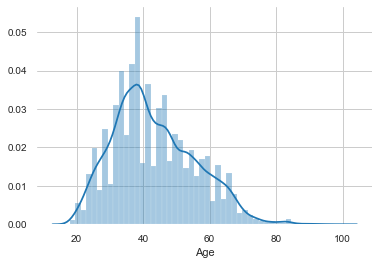

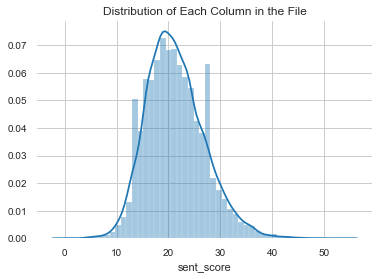

In [12]:
# Plot distribution of age and sentiment score variables in the dataframe
sns.set_style('whitegrid')
plt.title('Distribution of Each Column in the File')

kmean_df1 = kmean_df[['Age', 'sent_score']]

for i,col in enumerate(kmean_df1.columns):
    plt.figure(i)
    sns.distplot(kmean_df[col])

Age and Sentiment score does not seem to be normally distributed. K-means algorithm **cannot handle skewed distributions**. 
We will try **log transformation** to make the data normally distributed.

In [13]:
kmean_log = kmean_df1

kmean_log = kmean_log + 1   # add +1 to 0 values in columns before calculating log, to avoid get infinity  result
for col in kmean_log.columns:
    kmean_log[col] = np.log(kmean_log[col])

kmean_log.head()

,Age,sent_score
0,3.526361,3.135494
1,3.555348,3.258097
2,4.110874,2.944439
3,3.931826,3.583519
4,3.871201,2.995732


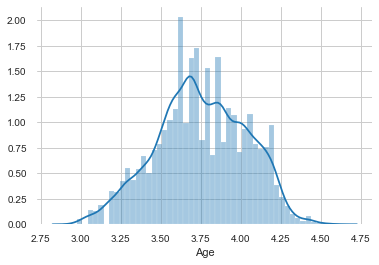

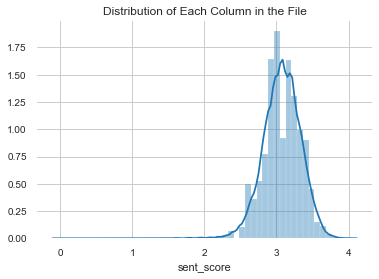

In [14]:
# Plot distribution of log values of age and sentiment score
sns.set_style('whitegrid')
plt.title('Distribution of Each Column in the File')

for i,col in enumerate(kmean_log.columns):
    if col == 'Age' or 'sent_score':
        plt.figure(i)
        sns.distplot(kmean_log[col])

Distribution seems to be normal now

#### Choosing k by elbow method

In [15]:
# Change to numpy array
kmean_ar = np.array(kmean_log)

In [16]:
# Choosing number of K

ssd = {}
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=42).fit(kmean_ar)
    # Inertia: Sum of distances of samples to their closest cluster center
    ssd[i] = kmeans.inertia_

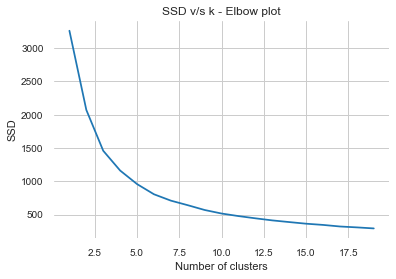

In [17]:
# Plot elbow graph 
plt.figure()
plt.plot(list(ssd.keys()), list(ssd.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.title('SSD v/s k - Elbow plot')
plt.show()

#### Choosing k = 6 & apply k-mean

In [18]:
# Apply k-mean to the data
kmeans_6 = KMeans(n_clusters=6,max_iter=1000,random_state=42).fit(kmean_ar)
kmean_df["clusters"] = kmeans_6.labels_

In [19]:
# Stats about cluster
clust_size = kmean_df.groupby('clusters').size().reset_index()
clust_size.columns = ['clusters', 'count']
clust_size['percentage'] = round((clust_size['count']/np.sum(clust_size['count']))*100, 2)
clust_size

,clusters,count,percentage
0,0,2622,11.58
1,1,5564,24.57
2,2,3880,17.14
3,3,3111,13.74
4,4,4007,17.70
5,5,3457,15.27


In [20]:
# Reset the sentiment scores into original values
kmean_df['sent_score'] = kmean_df['sent_score'] - min_senti

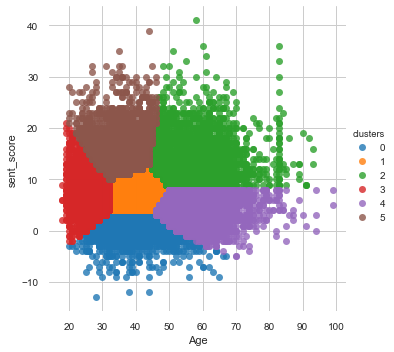

In [21]:
# Plot the cluster diagram
sns.lmplot('Age', 'sent_score', data=kmean_df, hue='clusters', fit_reg=False)
plt.show()

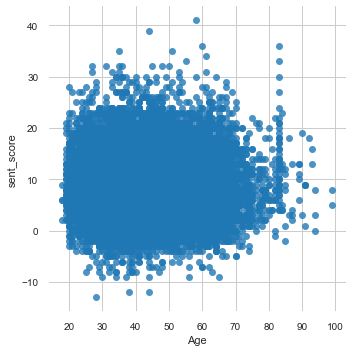

In [35]:
# Plot the scatter diagram
sns.lmplot('Age', 'sent_score', data=kmean_df, fit_reg=False)
plt.show()

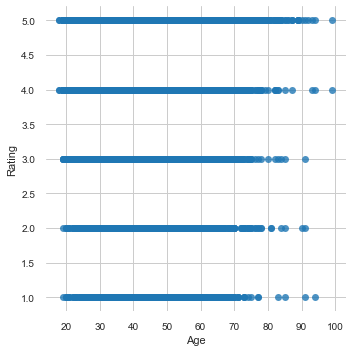

In [37]:
# Plot the scatter diagram
sns.lmplot('Age', 'Rating', data=kmean_df, fit_reg=False)
plt.show()

#### Interventions
0 - Middle Aged customers with Negative reviews<br>
1 - Middle Aged customers with Fairly Positive reviews<br>
2 - Older customers with positive reviews<br>
3 - Young customers with fairly positive reviews<br>
4 - Older customers with fairly positive reviews<br>
5 - Fairly young customers with positive reviews<br>

**a) The ranters (unhappy customers) ==> Cluster 0**<br>

In most businesses, this segment of customers will be handled by customer service team, but, don’t try to sell to them. Instead, ask them what you could change to make their experience better or ask them for their ideas to engage them.<br> 

**b) The ‘on the fence’ bunch ==> Cluster 1, 3 & 4**<br>

These are the trickiest group as it’s hard to get a true understanding into how they feel and whether or not the marketing efforts will be receptive or not. A good approach with this group could be to get your ravers to engage with them.<br>

**c) The ravers (happy customers) ==> Cluster 2, 5**<br>

We know they are happy, so let them tell the world. Give them some sort of incentive to promote your services on social media (small is fine and it will help drive repeat or additional purchases too). Their comment (positive word of mouth) next to an exclusive offer for their friends and family is ideal. This type of activity is often referred to as advocacy marketing.

### Clothing Recommendation based on Age & Ratings

In [22]:
# Get the data
recomm_df = df[['Age', 'Clothing ID', 'Rating']]
recomm_df.head()

,Age,Clothing ID,Rating
0,33,767,4
1,34,1080,5
2,60,1077,3
3,50,1049,5
4,47,847,5


In [23]:
# Step -1 : Create Reader
# A reader tells our algorithm what the lower and upper bound of our rating is.
# Cloth ratings are from 1 to 5
reader = Reader(rating_scale=(1, 5))

In [24]:
# Step-2 : Create dataset instance with a DataFrame and the reader
# Dataset is in order ==> 'Age', 'Clothing ID', 'Rating'
data = Dataset.load_from_df(recomm_df, reader)

In [25]:
# Step-3 : Keep 25% of your data for testing 
seed = 42
trainset, testset = train_test_split(data, test_size=.25, random_state=seed)

**Doing cross-validations on different algorithms to choose best one.**<br>
**Evaluating RMSE, MAE of algorithms on 5 folds.**

In [26]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), NormalPredictor()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
BaselineOnly,1.099175,0.883460,0.027865,0.038693
KNNWithMeans,1.123596,0.891820,0.335843,2.113830
KNNWithZScore,1.125613,0.893082,0.369777,2.777847
KNNBasic,1.125789,0.884663,0.311992,1.943660
SVD,1.135241,0.905350,2.337913,0.071480
NormalPredictor,1.428621,1.083164,0.053061,0.067722


**All algorithms shows similar RMSE and MAE values.**<br>
**We will choose BaselineOnly algorithm for building our model, because, A baseline prediction algorithm provides a set of predictions that you can evaluate as you would any predictions for your problem, such as classification accuracy or RMSE.**

In [27]:
print('Using ALS')
bsl_options = {'method': 'als', 'n_epochs': 5, 'reg_u': 12, 'reg_i': 5}
model = BaselineOnly(bsl_options=bsl_options)
cross_validate(model, data, measures=['RMSE'], cv=5, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([1.1093764 , 1.08862078, 1.10260012, 1.10927833, 1.08726302]),
 'fit_time': (0.02729010581970215,
  0.01315760612487793,
  0.03214526176452637,
  0.03481721878051758,
  0.03733563423156738),
 'test_time': (0.03558993339538574,
  0.02353692054748535,
  0.04228663444519043,
  0.08425354957580566,
  0.04829692840576172)}

**Train and Predict**

In [28]:
predictions = model.fit(trainset).test(testset)

Estimating biases using als...


In [29]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the age of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the id of the clothing item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['Age', 'Cid', 'rui', 'est', 'details'])
df['Uct'] = df.Age.apply(get_Iu)
df['Ict'] = df.Cid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [30]:
print(best_predictions)

      Age   Cid  rui       est                    details  Uct  Ict       err
781    28   864  4.0  4.000459  {'was_impossible': False}  332  117  0.000459
5160   48   871  4.0  4.001413  {'was_impossible': False}  454   40  0.001413
3895   50   941  4.0  3.998346  {'was_impossible': False}  305   63  0.001654
950    42   857  4.0  4.003275  {'was_impossible': False}  484   52  0.003275
4801   51  1089  4.0  4.003652  {'was_impossible': False}  283   66  0.003652
5582   41   900  4.0  4.004853  {'was_impossible': False}  533   11  0.004853
249    46   861  4.0  3.994305  {'was_impossible': False}  527  185  0.005695
1925   40   155  4.0  3.994138  {'was_impossible': False}  460    8  0.005862
573    55   827  4.0  4.005927  {'was_impossible': False}  249    6  0.005927
2345   46  1052  4.0  4.006146  {'was_impossible': False}  527   24  0.006146


In [31]:
print(worst_predictions)

      Age   Cid  rui       est                    details  Uct  Ict       err
5088   39   719  1.0  4.465238  {'was_impossible': False}  969    8  3.465238
4886   39   850  1.0  4.466607  {'was_impossible': False}  969  234  3.466607
4608   63   872  1.0  4.477956  {'was_impossible': False}  182  414  3.477956
2922   41   768  1.0  4.496127  {'was_impossible': False}  533    1  3.496127
4565   54   907  1.0  4.504113  {'was_impossible': False}  304  103  3.504113
5399   65   940  1.0  4.523195  {'was_impossible': False}  161   94  3.523195
2470   21   824  1.0  4.527146  {'was_impossible': False}   76   72  3.527146
2773   41  1048  1.0  4.562624  {'was_impossible': False}  533    7  3.562624
5360   39   939  1.0  4.634485  {'was_impossible': False}  969   62  3.634485
4052   32   964  1.0  4.698071  {'was_impossible': False}  456   57  3.698071


In [32]:
# Recommendations via Matrix Reconstruction
age = 36
item = 1039
model.predict(age, item)

Prediction(uid=36, iid=1039, r_ui=None, est=3.348828123745678, details={'was_impossible': False})

In [33]:
df.sort_values(by='est')[:10]

,Age,Cid,rui,est,details,Uct,Ict,err
3073,67,229,3.0,2.638202,{'was_impossible': False},106,8,0.361798
2539,36,229,3.0,2.803369,{'was_impossible': False},622,8,0.196631
3335,32,229,3.0,2.864429,{'was_impossible': False},456,8,0.135571
2471,34,946,5.0,2.999821,{'was_impossible': False},599,5,2.000179
64,43,946,3.0,3.059989,{'was_impossible': False},431,5,0.059989
2324,57,946,2.0,3.109018,{'was_impossible': False},275,5,1.109018
2538,53,569,1.0,3.213435,{'was_impossible': False},415,3,2.213435
4065,38,1039,4.0,3.216665,{'was_impossible': False},567,7,0.783335
2511,54,946,2.0,3.221219,{'was_impossible': False},304,5,1.221219
1634,53,929,3.0,3.313754,{'was_impossible': False},415,17,0.313754
